<h1 style="text-align: center;"> Estadística </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

In [39]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import gmean 
from scipy.stats import describe
from scipy.stats import f
from scipy.stats import t
import scipy.stats

import sklearn.preprocessing
import sklearn.utils

from statsmodels.stats.diagnostic import lilliefors

# Probablemente estoy haciendo trabajo rebundante ya que importo algunos modulos especificos de modulos ya importados.
# Pero así tengo esos modulos mas a mano, segurmante debería dejar de hacer esto

## Ejercicio 1. Cráneos egipcios

In [40]:
df = pd.read_excel("datosejercicioevaluacionanchuras.xlsx")

tempr = df[df["Época histórica"]==1]["Anchura del cráneo"]
tempr_arr = np.array(tempr)

tard = df[df["Época histórica"]==2]["Anchura del cráneo"]
tard_arr = np.array(tard)


### a.1. Obtener con Python las diferentes medidas de centralización y dispersión, asimetría y curtosis estudiadas. 

Las medidas estudiadas son:
* Medidas de posisción central
    * Media
        * Media aritmetica
        * Media geometrica
    * Mediana 
    * Moda
* Medidas de posición no centrales
    * Cuartiles
    * Deciles 
    * Percentiles
* Medias de dispersión 
    * Rango
    * Varianza
    * Desviación típica
    * Coeficiente de variación de Pearson
* Medidas de forma 
    * Asimetría 
    * Curtosis


In [41]:
count_tempr = int(len(tempr))
count_tard = int(len(tard))

# Medidas de posición central
## Media aritmetica
media_tempr = tempr.mean()
media_tard = tard.mean()

## Media geometrica 
mgeo_tempr = gmean(tempr)
mgeo_tard = gmean(tard)

## Mediana
mediana_tempr = tempr.median()
mediana_tard = tard.median()

## Moda
moda_tempr = tempr.mode().iloc[0]
moda_tard = tard.mode().iloc[0]

# Medidas de posicion no central
## Cuarrtiles
cuartil_25_tempr = tempr.quantile(0.25)
cuartil_25_tard = tard.quantile(0.25)
cuartil_75_tempr = tempr.quantile(0.75)
cuartil_75_tard = tard.quantile(0.75)

## Deciles
decil_10_tempr = tempr.quantile(0.1)
decil_10_tard = tard.quantile(0.1)

## Percentiles
percentil_1_tempr = tempr.quantile(0.01)
percentil_1_tard = tard.quantile(0.01)

# Medidas de dispersion
stats_tempr = describe(tempr)
stats_tard = describe(tard)

## Rango
rango_tempr = stats_tempr.minmax[1] - stats_tempr.minmax[0]
rango_tard = stats_tard.minmax[1] - stats_tard.minmax[0]

## Varianza
### Usando scipy
var_tempr = stats_tempr.variance
var_tard = stats_tard.variance

### Usando pandas
var_tempr_2 = tempr.var()
var_tard_2 = tard.var()

## Desviacion tipica
desv_tempr = math.sqrt(var_tempr)
desv_tard = math.sqrt(var_tard)

## Coeficiente de variacion de Pearson
CV_tempr = desv_tempr/media_tempr
CV_tard = desv_tard/media_tard 

# Medidas de forma
## Asimetria
asim_tempr = stats_tempr.skewness
asim_tard = stats_tard.skewness

## Curtosis
curtosis_tempr = stats_tempr.kurtosis
curtosis_tard = stats_tard.kurtosis

In [42]:
# Realizacion de la tabla de comparación
#-----------------------------------
def series_medidas(lista_valores):
    nombre_series = ["Count", "Media", "Media geometrica", "Mediana", "Moda",
                     "Cuartil 25", "Cuartil 75", "Decil 10", "Percentil 1",
                     "Rango", "Varianza", "Desviación típica", "Coeficiente de variacion de Pearson",
                     "Coeficiente de asimetria de Fisher", "Coeficiente Curtosis"]
    
    series_dict = dict()
    for i in range(len(nombre_series)):
        series_dict[nombre_series[i]] = lista_valores[i]

    return pd.Series(series_dict)

medidas_tempr = [count_tempr, media_tempr, mgeo_tempr, mediana_tempr, moda_tempr,
                 cuartil_25_tempr, cuartil_75_tempr, decil_10_tempr, percentil_1_tempr,
                 rango_tempr, var_tempr, desv_tempr, CV_tempr,
                 asim_tempr, curtosis_tempr]
series_tempr = series_medidas(medidas_tempr)

medidas_tard = [count_tard, media_tard, mgeo_tard, mediana_tard, moda_tard,
                cuartil_25_tard, cuartil_75_tard, decil_10_tard, percentil_1_tard,
                rango_tard, var_tard, desv_tard, CV_tard,
                asim_tard, curtosis_tard]
series_tard = series_medidas(medidas_tard)



# ---------------------------------------------------------
columnas_predinastico = ["Predinástico temprano", "Predinástico tardío"]

medidas_df = pd.DataFrame({columnas_predinastico[0]: series_tempr, columnas_predinastico[1]: series_tard})
medidas_df

,Predinástico temprano,Predinástico tardío
Count,30.000000,30.000000
Media,131.533333,132.466667
Media geometrica,131.530873,132.462963
Mediana,131.500000,133.000000
Moda,131.000000,133.000000
Cuartil 25,131.000000,132.000000
Cuartil 75,132.000000,133.000000
Decil 10,131.000000,131.000000
Percentil 1,130.000000,131.000000
Rango,4.000000,4.000000


### a.2 Histograma y diagramas de caja y bigotes.

In [43]:
def histogramas(datos, media, titulo):
    plt.figure(figsize=(8, 6))
    sns.histplot(datos, bins=6, kde=False, color='steelblue', edgecolor='black')

    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')

    # Etiquetas y título
    plt.title(titulo, fontsize=14)
    plt.xlabel('Altura del cráneo', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

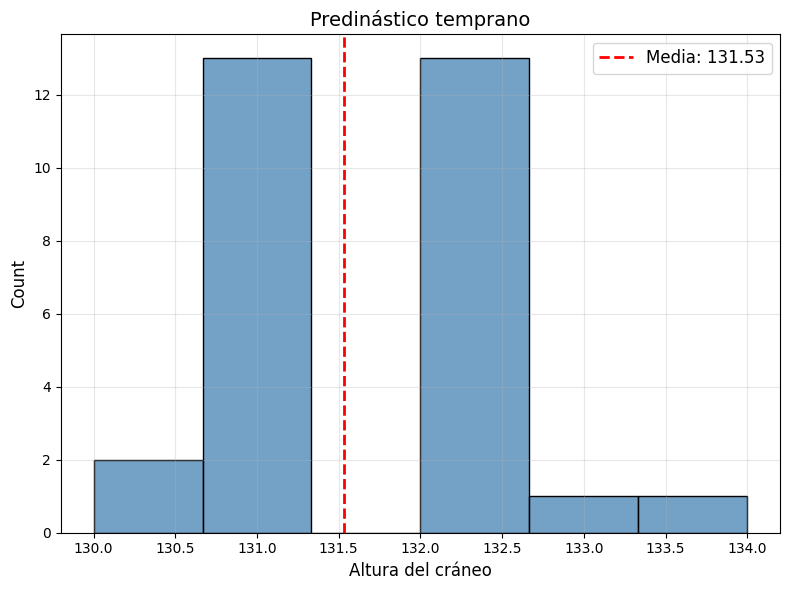

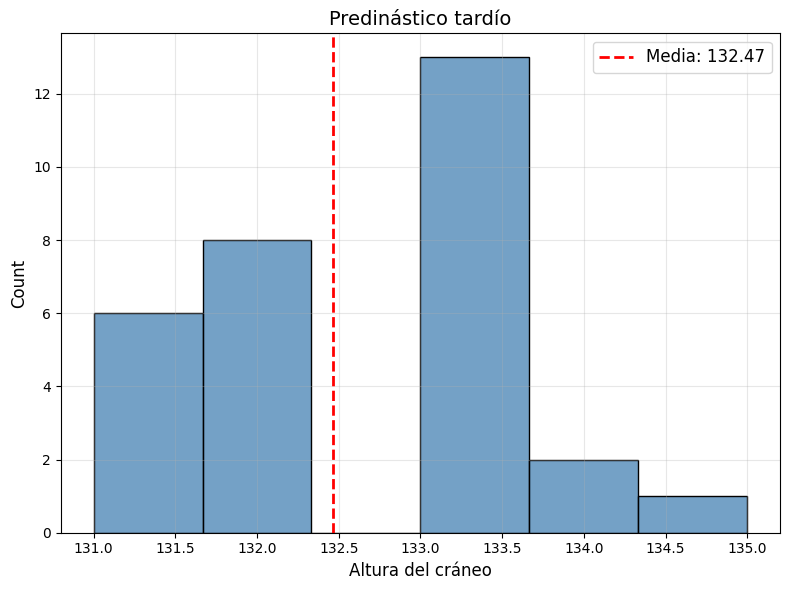

In [44]:
histogramas(tempr, media_tempr, "Predinástico temprano")
histogramas(tard, media_tard, "Predinástico tardío")

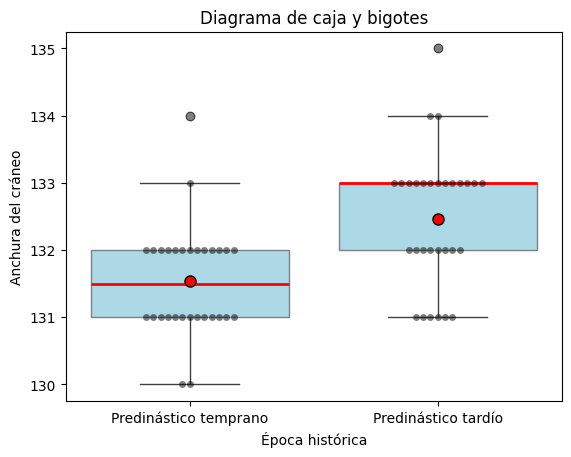

In [45]:

sns.boxplot(x='Época histórica', y='Anchura del cráneo', data=df,boxprops=dict(facecolor='lightblue', edgecolor='gray'),
            showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"8"},
            medianprops={'color': 'red', 'linewidth': 2})
sns.swarmplot(x='Época histórica', y='Anchura del cráneo', data=df, color='black', alpha=0.5)
plt.title('Diagrama de caja y bigotes')
plt.xticks(ticks=[0,1], labels=["Predinástico temprano", "Predinástico tardío"])
plt.show()

Conclusiones de los datos:

**Periodo Predinástico temprano**:
* Uno de los aspectos mas interesantes al observar el diagrama de caja y bigotes(con la variante de ver todos los registros) y el histograma es que 26 de los 30 registros se dividen equitatitivamente en los valores 131 y 132. Esto nos indica que para el valor de la moda habría un empate.
* Existe un único valor atípico que se encuentra a una anchura de 134. 
* El coeficiente de variacion es mas bajo que la unidad, con lo que podemos pensar que provienen de una muestra homogenea.
* El coeficiente de asimetria es un poco positivo por lo que parece que la cola se extiende para valores superiores a la media. Aunque es relativamente pequeño
* El coeficiente de curtosis nos da un valor relativamente bajo y eso significa que hay pocos valores en la media.

**Periodo Predinástico tardío**
* Podemos observar que la mediana y el cuartil 75 es el mismo, por lo que al menos el 25% de los datos se encuentran aquí.
* Existe un único valor atípico
* El coeficiente de variacion es mas bajo que la unidad, con lo que podemos pensar que provienen de una muestra homogenea.
* El coeficiente de asimetria es un poco positivo por lo que parece que la cola se extiende para valores superiores a la media. Aunque es relativamente pequeño


En el diagrama de caja y bigotes he decidido añadir el valor de la media, únicamente para ilustrar donde se situaría. Sé que está mal poner la media ya que no es un estadístico robusto y no da información relevante, pero creo que puede ser una ayuda.

## b. Determinar si las dos clases de muestras siguen una distribución normal mediante el test Kolmogorov-Smirnov.

<span style="color:blue">He de inidicar que en este apartado me he explayado un poco explicando cada cosa ya que soy nuevo en estadística y seguramente use este apartado cunado quiera volver a entender cosas de contrastes</span> 

Nuestro contraste de Kolmogorov-Smirnov tiene las dos posibles hipotésis:
* $H_0$: La muestra proviene de un modelo continuo F(x), el cual sigue una distribución normal.
* $H_1$: La muestra no proviene de una distrución normal.

Cuando en nuestra muestra existe un registro que tiene una probabilidad muy pequeña de ocurrir en caso de que $H_0$ sea cierto, deberiamos empezar a dudar de que la hipotesis nula sea cierta. Es por ello que en un contraste es necesario definir un nivel de significación $\alpha$, el cual nos indica que si al encontrar un registro con una probabilidad $\alpha$ de ocurrir en nuestra muestra muestra deberiamos empezar a dudar la $H_0$. Visto de otra manera, este número puede interpretarse como la probabilidad que estamos dispuestos a asumir de rechazar $H_0$ cuando es cierta.
Para nuestro problema hemos decidio usar:
$$
\alpha = 0.05
$$
Lo cual en las tablas tabuladas del contraste de Kolmogorov-Smirnov nos da un valor crítico de:
$$
nivel\; crítico = 0.242
$$

Teniendo $\alpha$ fijado, nuestra región de rechazo estará determinada por $d_c$ el cual es la discrepancia máxima que estamos dispuestos a permitir. $d_c$ es elegida tal que:
$$
P(d>d_c|H_0 \quad es \: cierta)=\alpha
$$

El *nivel crítico* o *p-value* del contraste nos indica la probabilidad de obtener un valor igual de extremo que la de nuestra muestra, cuando $H_0$ es cierta.
$$
p=Prob(d\geq \hat{d}/H_0)
$$

En caso de que nuestro *valor crítico* o *p-value* sea inferior a nuestro $\alpha$, significará que la probabilidad de encontrar una muestra como la que tenemos, de una población donde $H_0$ es verdadero, será una probabilidad muy baja y para no cometer errores de tipo I podremos negar la hipotesis nula.


Para realizar el contraste lo primero que debemos hacer es estandarizar los datos.

In [46]:
def estandarizador(datos):
    estandar = sklearn.preprocessing.StandardScaler()
    return estandar.fit_transform(datos)

stand_tempr = estandarizador(tempr_arr.reshape(-1,1)).flatten()
stand_tard = estandarizador(tard_arr.reshape(-1,1)).flatten()

Bueno ahora vamos a realizar la combrobación de si ambas muestras provienen de una distribución normal o no. Usaremos la libreria de python llamada *scipy.stats.ks_1samp*

In [47]:
statistic_tempr, pvalue_tempr = scipy.stats.ks_1samp(stand_tempr, scipy.stats.norm.cdf)
statistic_tard, pvalue_tard = scipy.stats.ks_1samp(stand_tard, scipy.stats.norm.cdf)

df3 = pd.DataFrame([[statistic_tempr, pvalue_tempr], [statistic_tard, pvalue_tard]], 
                   index=columnas_predinastico,
                   columns=["Estadistico","p value"])
df3

,Estadistico,p value
Predinástico temprano,0.246042,0.043795
Predinástico tardío,0.238093,0.055727


Realicemos el estudio de los resultados del contraste:

**Predinástico temprano**
* Estadístico nos indica el valor de discrepancia superior al permitido por el contraste, por lo que se debe rechazar la hipotesis nula.
* p value nos indica que esta muestra es poco probable que ocurra al recoger 30 registros de una población con $H_0$ verdadera.

En resumen, a un nivel de confianza del 95% existe evidencia para rechazar la hipotesis nula. Pero al ser una muestra con 30 registros no hay evidencia estadistica sufuciente para rechazarla. Asumiremos que es una distribución normal para los siguientes ejercicios aunque es posible que no lo sea.

**Predinastico tardío**
* Estadistico nos indica una discrepancia incluida en la región de aceptación.
* p-value nos indica que existe una probabilidad aceptable de que nuestra muestra sea de la población definida en $H_0$
Se puede concluir que a un nivel de confianza del 95% no existe suficiente evidencia para rechazar la $H_0$ luego la muestra sigue una distribución normal.


----------------------------------------------

El contraste de Kolmogorov-Smirnov tiene el inconveniente de que al calcular F(x) estimando los parámetros de la población mediante la muestra, el contraste tiende a aceptar la hipótesis nula $H_0$.

Para estos casos donde se utilizan los parámetros de la muestra para calcular F(x) la corrección Lilliefords suele dar mejores resultados.
* $\mu \to \bar{x}$
* $\sigma^2 \to \hat{s}^2$

El problema con esta corrección es que para tamaños muestrales medianos, la potencia es baja. Así que al final he decidido usar el contraste sin la corrección de Lilliefors, ya que no estoy seguro de su resultado.

In [48]:
statistic_tempr, pvalue_tempr = lilliefors(stand_tempr)
statistic_tard, pvalue_tard = lilliefors(stand_tard)

df3 = pd.DataFrame([[statistic_tempr, pvalue_tempr], [statistic_tard, pvalue_tard]], 
                   index=columnas_predinastico,
                   columns=["Estadistico","p value"])
df3

,Estadistico,p value
Predinástico temprano,0.242463,0.001
Predinástico tardío,0.234963,0.001


Me sale unos valores de *p-value* muy extraños y no entiendo muy bien como se han podido dar. No le he dado muchas mas vueltas porque no se a donde puede llegar

## Ejercicio 2. 

### a. Con los mismos datos del ejercicio anterior, obtener un intervalo de confianza (de nivel 0.9, de nivel 0.95 y de nivel 0.99) para la diferencia entre las medias de la anchura de la cabeza en ambos periodos históricos. 
Interpretar los resultados obtenidos y discutirlos en función del test de normalidad del ejercicio anterior. La interpretación debe ser rigurosa desde el punto de vista estadístico y también marcada por el story telling, es decir, comprensible desde el punto de vista de las variables respondiendo a la pregunta ¿en qué época la cabeza era más ancha?

Primero debemos asegurarnos de que se cumplen las siguientes condiciones:
* Definir que las muestras son independientes. Este dato viene dado en el apartado b, dictaminando que si son independientes.
* Saber si las varianzas poblacionales son desconocidas. Como en el enunciado no nos dan las varianzas, las daremos por desconocidas.
* Demostrar si las varianzas poblacionales son iguales o diferentes

Primero deberemos averiguar si las dos poblaciones normales (se que hemos detallado en el apartado anterior que los datos del *Predinastico temprano* no siguen una distribución normal, pero realizaremos los calculos como si lo fuera) tienen la misma varianza, para ello plantearemos las siguientes hipotesis:

$$ H_0: \sigma_1^2 = \sigma_2^2$$
$$ H_1: \sigma_1^2 \neq \sigma_2^2$$

Para llevar a cabo esta comparación la discrepancia entre las varianzas muestrales será:
$$ d=\frac{\hat{s}_1^2}{\hat{s}_2^2}=F_{(n_1-1;n_2-1)}$$
Ahora definiremos la región de aceptación con los valores $F_a$ y $F_b$ tales que:
$$ P(F_a\leq F\leq F_b)=1-\alpha$$


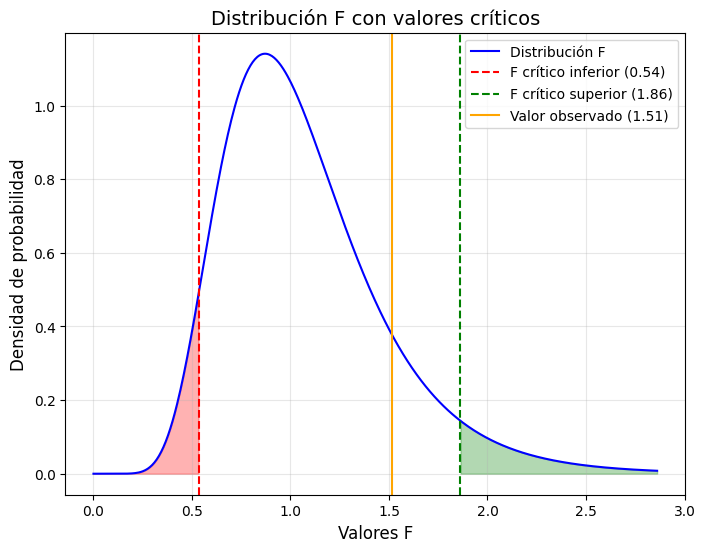

In [49]:
alpha = 0.05
gl_tempr = count_tempr-1
gl_tard = count_tard-1

# Para asegurar que los grados de libertad son los correctos
# he usado la siguiente funcion
var_tempr_df1 = np.var(tempr, ddof=1)
var_tard_df1 = np.var(tard, ddof=1)


f_observado = (var_tard_df1/var_tempr_df1)

# Calculamos los limites
f_critical_lower = f.ppf(alpha, gl_tempr, gl_tard)  
f_critical_upper = f.ppf(1 - alpha, gl_tempr, gl_tard) 

# Realizamos el calculo de la funcion F
x = np.linspace(0, f_critical_upper + 1, 500)  
y = f.pdf(x, gl_tempr, gl_tard) 

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Distribución F", color="blue")

# Resaltar los valores críticos
plt.axvline(f_critical_lower, color="red", linestyle="--", label=f"F crítico inferior ({f_critical_lower:.2f})")
plt.axvline(f_critical_upper, color="green", linestyle="--", label=f"F crítico superior ({f_critical_upper:.2f})")
plt.axvline(f_observado, color="orange", linestyle="-", label=f"Valor observado ({f_observado:.2f})")

# Rellenar las áreas críticas
plt.fill_between(x, y, 0, where=(x <= f_critical_lower), color='red', alpha=0.3)
plt.fill_between(x, y, 0, where=(x >= f_critical_upper), color='green', alpha=0.3)

# Etiquetas y leyenda
plt.title("Distribución F con valores críticos", fontsize=14)
plt.xlabel("Valores F", fontsize=12)
plt.ylabel("Densidad de probabilidad", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Del gráfico y al ver que el valor F de la desviacion estandar entra dentro de los valores criticos de la prueba podemos concluir a un 90% de confianza que no existe evidencia estadítica suficiente para rechazar $H_0$. Así que nuestra hipótesis nula se aprueba, indicandonos que las Desviaciones Estándar de ambas muestras son iguales.

Ahora vamos a realizar los intervalos de confianza.

In [50]:
# Calculamos el error estandar estimado:
numerador = (count_tempr*var_tempr+count_tard*var_tard)*((1/count_tempr)+(1/count_tard))
denominador = (count_tard+count_tempr-2)
EEE = math.sqrt(numerador/denominador)
print(EEE)

0.24121505084275266


In [51]:
def intervalo_confianza(confianza, EEE, media1, media2, grados_libertad):
    alpha = 1-confianza
    t_critico = t.ppf(1-alpha/2, grados_libertad)
    error = t_critico*EEE
    limite_inferior = media1-media2-error
    limite_superior = media1-media2+error
    return limite_inferior, limite_superior

In [52]:
df3 = pd.DataFrame([intervalo_confianza(0.90, EEE, media_tempr, media_tard, denominador),
                    intervalo_confianza(0.95, EEE, media_tempr, media_tard, denominador),
                    intervalo_confianza(0.99, EEE, media_tempr, media_tard, denominador)], 
                   index=["90%", "95%", "99%"],
                   columns=["Limite inferior","Limite superior"])
df3

,Limite inferior,Limite superior
90%,-1.336537,-0.530130
95%,-1.416178,-0.450489
99%,-1.575758,-0.290908


Al ver estos intervalos de confianza de la diferencia de medias, donde ninguno incluye el valor 0 (el cual indicaría que no hay diferencia de media) podemos inidcar que ambas poblaciones son diferentes. Y además al ver que todas son negativas, significa que la media de los cráneos en el periodo temprano son menos anchos que los cráneos en el periodo tardío. 

### b. Utilizar el test t para contrastar la hipótesis de que ambas medias son iguales. 
Explicar qué condiciones se deben cumplir para poder aplicar ese contraste. Determinar si se cumplen. Admitiremos de forma natural la independencia entre ambas muestras, así que esa condición no hace falta comprobarla. 

Debemos asegurarnos de que se cumplen las siguientes condiciones:
1. Normalidad de los datos. Según la prueba de Kolmogorov no se cumple la normalidad en el predinastico temprano
2. Homogeneidad de la varianza. Lo que se demuestra en el apartado anterior lo contrario. Igualmente realizaremos los calculos
3. Independencia de las variables. Viene implicito en el enunciado

Ahora podemos plantear la siguiente hipótesis:
$$ H_0 : \mu_0=\mu_1$$
$$ H_1 : \mu_0 \neq \mu_1$$

Consideraciones:
* Para demostrar que las medias son iguales o distintas tenemos que usar una prueba de dos colas.
* Consideramos un intervalo de confianza de 95%, equivalente a $\frac{\alpha}{2}=0.025$
* Utilizaremos los grados de libertad igual a $n_1 + n_2 -2$



In [53]:
alpha = 0.025

t_estad, p_value = scipy.stats.ttest_ind(tempr, tard, equal_var=True)

df3 = pd.DataFrame([t_estad, p_value],
                   columns=[""],
                   index=["Estadistico",
                           "p value"])
df3

,
Estadistico,-3.935446
p value,0.000225


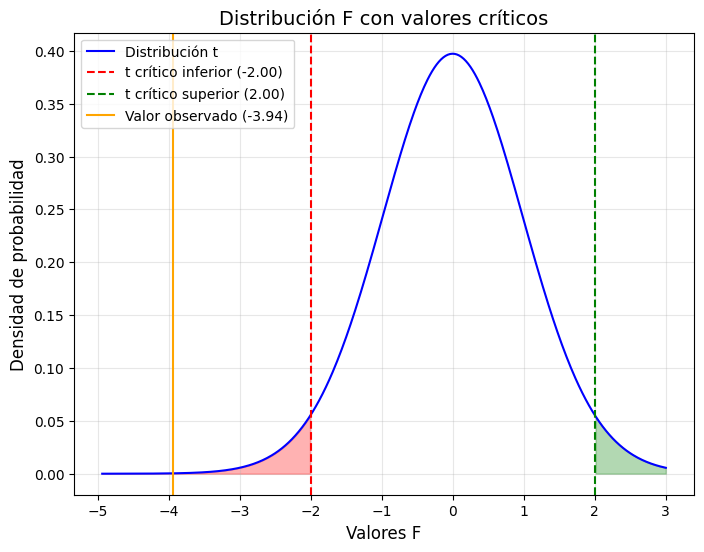

In [54]:
# Calculamos los valores cr´ticos de la distribución
t_critical_lower = t.ppf(alpha, denominador)  
t_critical_upper = t.ppf(1 - alpha, denominador) 

# Generamso la distribucion t
x = np.linspace(-1+t_estad, t_critical_upper + 1, 500)  
y = t.pdf(x, denominador) 

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Distribución t", color="blue")

# Resaltar los valores críticos
plt.axvline(t_critical_lower, color="red", linestyle="--", label=f"t crítico inferior ({t_critical_lower:.2f})")
plt.axvline(t_critical_upper, color="green", linestyle="--", label=f"t crítico superior ({t_critical_upper:.2f})")
plt.axvline(t_estad, color="orange", linestyle="-", label=f"Valor observado ({t_estad:.2f})")

# Rellenar las áreas críticas
plt.fill_between(x, y, 0, where=(x <= t_critical_lower), color='red', alpha=0.3)
plt.fill_between(x, y, 0, where=(x >= t_critical_upper), color='green', alpha=0.3)

# Etiquetas y leyenda
plt.title("Distribución F con valores críticos", fontsize=14)
plt.xlabel("Valores F", fontsize=12)
plt.ylabel("Densidad de probabilidad", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Los resultados de este apartado nos da:
Con un intervalo de confianza del 95% se rechaza la H0 (Las medias de ambas muestras son iguales) por lo que podemos decir que las medias poblacionales son diferentes

Y además indicamos que la anchura del periodo tardío es mayor que los cráneos del periodo temprano. Esto se delata en el gráfico al ver que está muy a la izquierda el valor t observado.